In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r'C:\Users\Gev\Desktop\Data science\house-prices-advanced-regression-techniques\files\train.csv'

In [3]:
frame = pd.read_csv(path, index_col = 0)

In [4]:
df = frame.iloc[:, 60:]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   GarageCars     1460 non-null   int64 
 1   GarageArea     1460 non-null   int64 
 2   GarageQual     1379 non-null   object
 3   GarageCond     1379 non-null   object
 4   PavedDrive     1460 non-null   object
 5   WoodDeckSF     1460 non-null   int64 
 6   OpenPorchSF    1460 non-null   int64 
 7   EnclosedPorch  1460 non-null   int64 
 8   3SsnPorch      1460 non-null   int64 
 9   ScreenPorch    1460 non-null   int64 
 10  PoolArea       1460 non-null   int64 
 11  PoolQC         7 non-null      object
 12  Fence          281 non-null    object
 13  MiscFeature    54 non-null     object
 14  MiscVal        1460 non-null   int64 
 15  MoSold         1460 non-null   int64 
 16  YrSold         1460 non-null   int64 
 17  SaleType       1460 non-null   object
 18  SaleCondition  1460 non-null

In [6]:
sns.set_style('whitegrid')

In [7]:
def graph(col):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16, 4 ))
    
    ax1 = sns.boxplot(x = col, palette = 'Set3', ax = ax1)
    ax1.set_title('Boxplot {}'.format(col.name), fontsize = 13)
    
    ax2 = sns.scatterplot(y = df['SalePrice'], x = col, color = 'forestgreen', ax = ax2)
    ax2.set_title('Scatterplot {}'.format(col.name), fontsize = 13)
    
    
    plt.show()

In [8]:
# Handling missing values

In [9]:
df.loc[df['GarageQual'].isnull(), 'GarageQual'] = 'Na'
df.loc[df['GarageCond'].isnull(), 'GarageCond'] = 'Na'

In [10]:
df.drop(columns = ['PoolQC', 'Fence', 'MiscFeature'], inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   GarageCars     1460 non-null   int64 
 1   GarageArea     1460 non-null   int64 
 2   GarageQual     1460 non-null   object
 3   GarageCond     1460 non-null   object
 4   PavedDrive     1460 non-null   object
 5   WoodDeckSF     1460 non-null   int64 
 6   OpenPorchSF    1460 non-null   int64 
 7   EnclosedPorch  1460 non-null   int64 
 8   3SsnPorch      1460 non-null   int64 
 9   ScreenPorch    1460 non-null   int64 
 10  PoolArea       1460 non-null   int64 
 11  MiscVal        1460 non-null   int64 
 12  MoSold         1460 non-null   int64 
 13  YrSold         1460 non-null   int64 
 14  SaleType       1460 non-null   object
 15  SaleCondition  1460 non-null   object
 16  SalePrice      1460 non-null   int64 
dtypes: int64(12), object(5)
memory usage: 205.3+ KB


In [12]:
# Handling data types

In [13]:
df.iloc[:, 2:5] = df.iloc[:, 2:5].astype('category')

In [14]:
df.iloc[:, 14:16] = df.iloc[:, 14:16].astype('category')

In [15]:
cat_col = ['GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   GarageCars     1460 non-null   int64   
 1   GarageArea     1460 non-null   int64   
 2   GarageQual     1460 non-null   category
 3   GarageCond     1460 non-null   category
 4   PavedDrive     1460 non-null   category
 5   WoodDeckSF     1460 non-null   int64   
 6   OpenPorchSF    1460 non-null   int64   
 7   EnclosedPorch  1460 non-null   int64   
 8   3SsnPorch      1460 non-null   int64   
 9   ScreenPorch    1460 non-null   int64   
 10  PoolArea       1460 non-null   int64   
 11  MiscVal        1460 non-null   int64   
 12  MoSold         1460 non-null   int64   
 13  YrSold         1460 non-null   int64   
 14  SaleType       1460 non-null   category
 15  SaleCondition  1460 non-null   category
 16  SalePrice      1460 non-null   int64   
dtypes: category(5), int64(12)
memory 

In [17]:
for col in cat_col:
    
    categories = (list(df[col].cat.categories)) # All values of column
    number_of_categories = len(categories)
    replace_list = list(range(number_of_categories)) # Number equivalents of categories
    replace_dict = {}
    
    for i in range(number_of_categories): # Making replace dict
        replace_dict[categories[i]] = replace_list[i]
    
    df[col] = df[col].replace(replace_dict)

## First 8 features

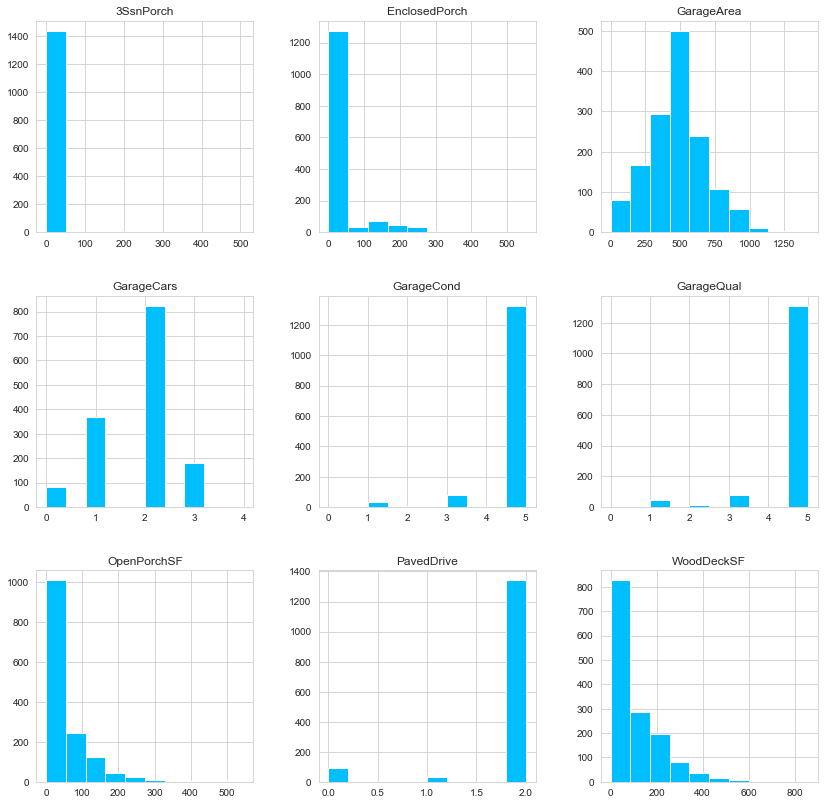

In [18]:
df.iloc[:, :9].hist(color = 'deepskyblue', figsize = (14,14))
plt.show()

In [19]:
def heatmap(frame):
    plt.figure(figsize = (8,7))

    corr = frame.corr()

    cmap = ['purple', 'gray', 'gray', 'gray', 'deepskyblue'] # color map
    
    sns.heatmap(corr, linewidth = .5, annot = True, vmin = -1, vmax = 1, center = 0, cmap = cmap)

    plt.show()

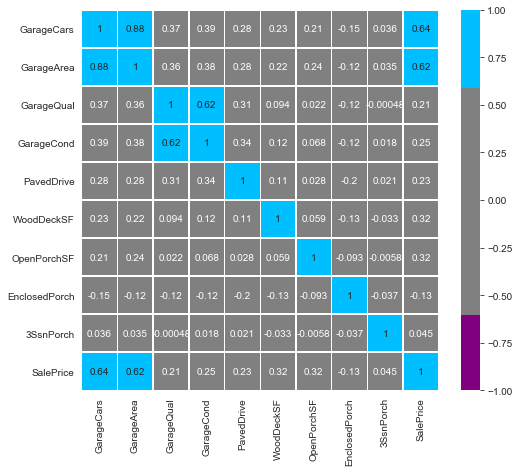

In [20]:
heatmap(df.iloc[:,:9].join(df['SalePrice']))

In [21]:
drop_list = ['GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch']
# Other features I'll keep for future

## Last 7 features

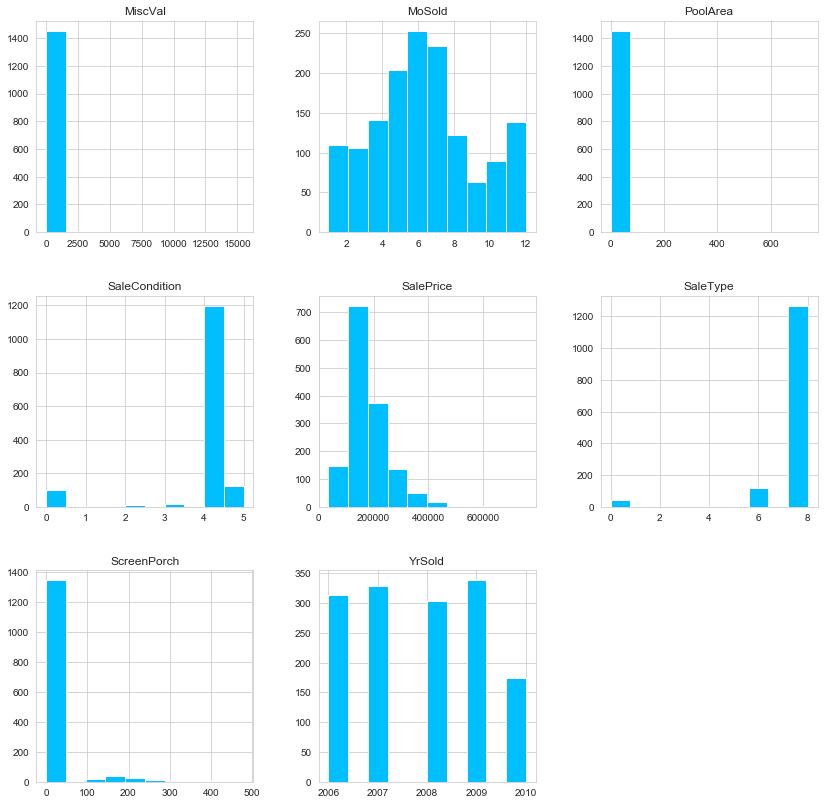

In [22]:
df.iloc[:, 9:].hist(color = 'deepskyblue', figsize = (14,14))
plt.show()

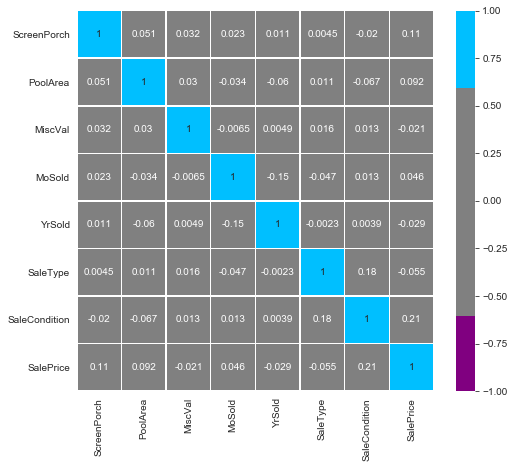

In [23]:
heatmap(df.iloc[:,9 :])

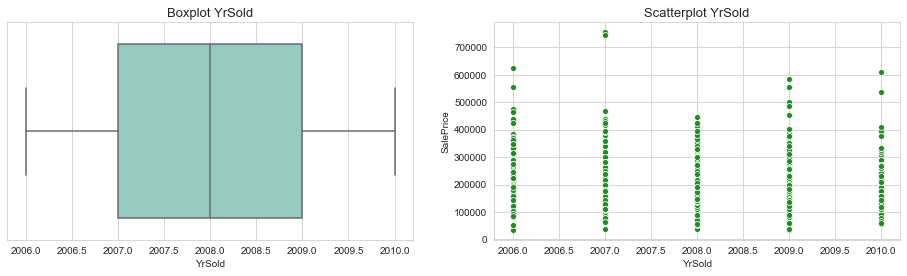

In [24]:
graph(df['YrSold'])

I thought that there should be some relation between YrSold and Price, but as we can see, there is not

### Becaues of their bad distribution I decided to drop all these features

In [25]:
drop_list.extend(['ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'])

In [26]:
df.drop(columns = drop_list, inplace = True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   GarageCars   1460 non-null   int64
 1   GarageArea   1460 non-null   int64
 2   WoodDeckSF   1460 non-null   int64
 3   OpenPorchSF  1460 non-null   int64
 4   SalePrice    1460 non-null   int64
dtypes: int64(5)
memory usage: 108.4 KB


## So we have 1 categorical feature and 3 continuous features

In [28]:
def boxplot(feature):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,4))
    
    ax1 = sns.boxplot(x = feature, y = df['SalePrice'], palette = 'Set3', ax = ax1)
    ax1.set_title('Boxpot {}'.format(feature.name), fontsize = 13)
    
    ax2 = feature.hist(color = 'deepskyblue', ax = ax2)
    ax2.set_title('Distribution {}'.format(feature.name), fontsize = 13)

In [29]:
# GarageCars

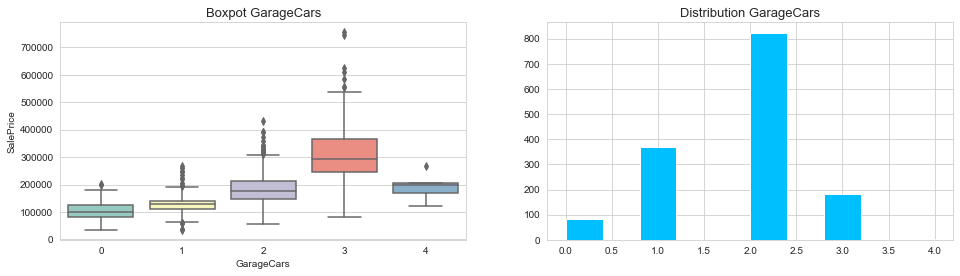

In [30]:
boxplot(df['GarageCars'])

In [31]:
df.GarageCars.value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

### At first, I wanted to move datapoints from '4.0' value to '2.0', as they are mostly similar by boxplots. But later I decided not to do so, as my previous tests show no significant effects. 

In [32]:
# GarageArea

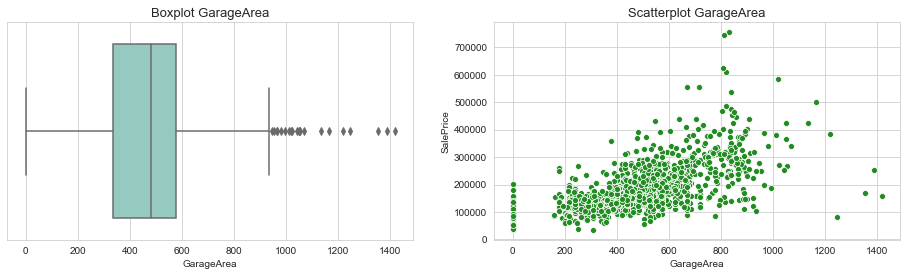

In [33]:
graph(df['GarageArea'])

In [34]:
df['GarageArea'].sort_values(ascending = False).iloc[:7]

Id
1299    1418
582     1390
1191    1356
1062    1248
826     1220
179     1166
665     1134
Name: GarageArea, dtype: int64

In [35]:
df.loc[df['GarageArea'] > 1350, 'GarageArea'] = df['GarageArea'] - 250

In [36]:
df.loc[df['GarageArea'] > 1240, 'GarageArea'] = df['GarageArea'] - 50

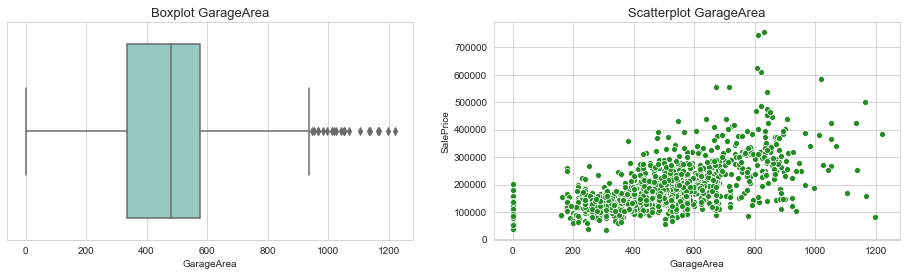

In [37]:
graph(df['GarageArea'])

In [38]:
# WoodDeckSF

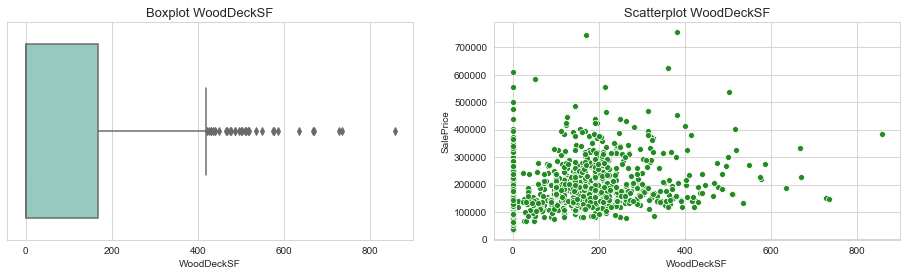

In [39]:
graph(df['WoodDeckSF'])

In [40]:
df.loc[df['WoodDeckSF'] > 600, 'WoodDeckSF'] = df['WoodDeckSF'] - 180

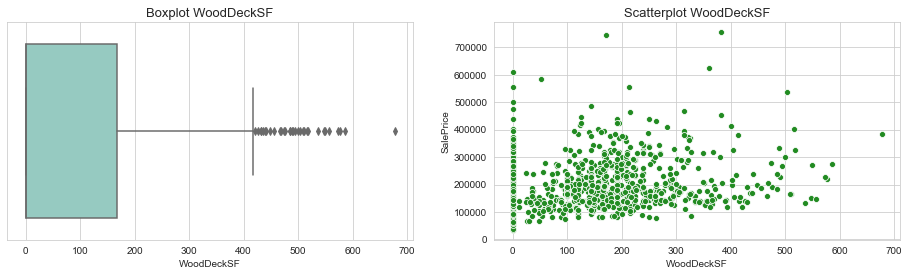

In [41]:
graph(df['WoodDeckSF'])

In [42]:
df['WoodDeckSF'].sort_values(ascending = False).iloc[:3]

Id
54      677
1424    586
65      576
Name: WoodDeckSF, dtype: int64

In [43]:
df.loc[df['WoodDeckSF'] > 600, 'WoodDeckSF'] = 600

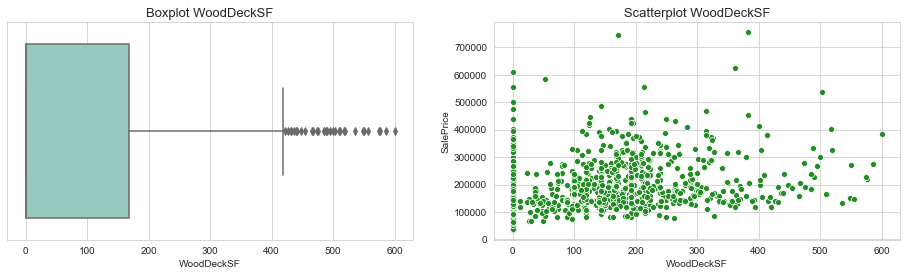

In [44]:
graph(df['WoodDeckSF'])

In [45]:
# OpenPorchSF

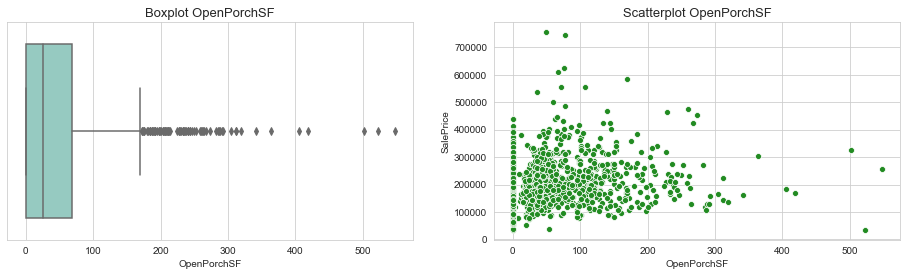

In [46]:
graph(df['OpenPorchSF'])

In [47]:
df['OpenPorchSF'].sort_values(ascending = False).iloc[:6]

Id
1329    547
496     523
584     502
855     418
524     406
876     364
Name: OpenPorchSF, dtype: int64

In [48]:
df.loc[df['OpenPorchSF'] > 400, 'OpenPorchSF'] = df['OpenPorchSF'] - 50
df.loc[df['OpenPorchSF'] > 400, 'OpenPorchSF'] = df['OpenPorchSF'] - 100

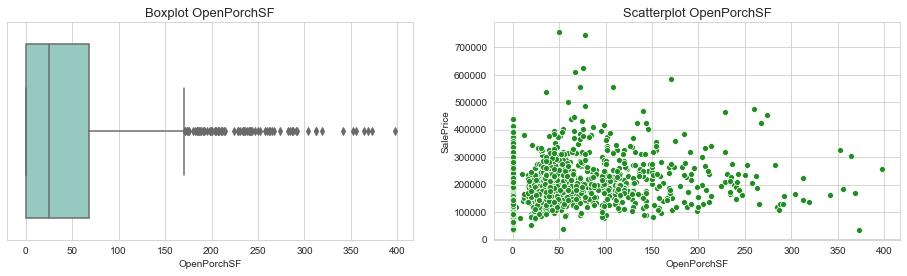

In [49]:
graph(df['OpenPorchSF'])

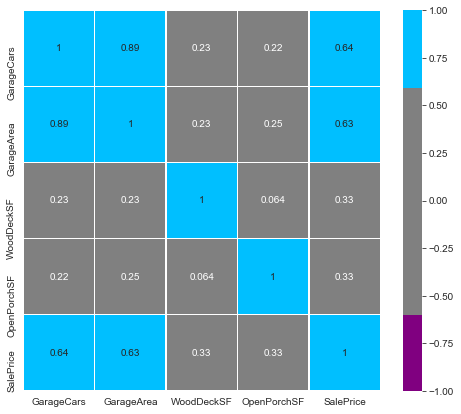

In [50]:
heatmap(df)

### Since there is strong relatioship between GarageCars and GarageArea (obviously) I'll keep only one of them. I decided to keep GarageArea, as working with continuous features is easier.

In [51]:
df = df.drop(columns = ['GarageCars'])

In [52]:
df.head()

,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
Id,,,,
1,548,0,61,208500
2,460,298,0,181500
3,608,0,42,223500
4,642,0,35,140000
5,836,192,84,250000


## An interesting fact. I spent aproximatly 2 hours working at part 1 and aproximatly 1 hour working at this part. For me 100% productivity increase is a good result.
#### P. S. Apparently it is also beacuse of less size of final data, but anyway.

In [53]:
from sklearn import metrics, linear_model, model_selection

In [54]:
reg = linear_model.Ridge()

In [55]:
print('Linear Regression with all features')
print(model_selection.cross_val_score(reg, X = df, y = df['SalePrice'],
                                      cv = 5, scoring = 'neg_mean_squared_log_error'))

Linear Regression with all features
[-5.88944100e-27 -9.31193025e-27 -8.36869035e-27 -9.80037563e-27
 -7.81633643e-27]


In [56]:
df.to_csv(r'C:\Users\Gev\Desktop\Data science\house-prices-advanced-regression-techniques\Train_data\part4.csv')